In [13]:
from plane_packing import Plane
import packing_orders
from random import shuffle
import os

In [16]:
orders = [(packing_orders.random_order,'random_order'),
          (packing_orders.back_to_front,'back_to_front'),
          (packing_orders.front_to_back,'front_to_back'),
          (packing_orders.windows_first,'windows_first'),
          (packing_orders.alley_first,'alley_first')]

for orderfun, name in orders:
    p = Plane(5,3)
    destinations = orderfun(p)

    images = []
    SIZE = 2

    j=0
    images.append(p.to_image(SIZE))

    p.spawn(destinations[0],1)
    del destinations[0]

    j+=1
    images.append(p.to_image(SIZE))

    while not (p.happy):
        if len(destinations) > 0:
            dest = destinations[0]
            success = p.spawn(dest)
            if success:
                del destinations[0]

        p.update_passengers()
        j += 1
        images.append(p.to_image(SIZE))

    images[0].save('{}.gif'.format(name),
                   save_all=True,
                   append_images=images[1:],
                   duration=len(images),
                   loop=0)

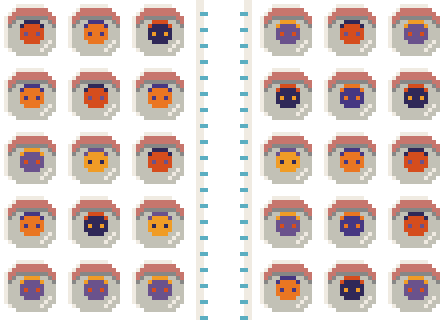

In [7]:
images[-1]